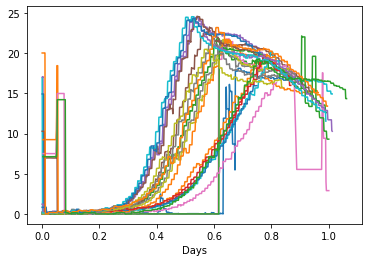

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import glob
path='files'
all_files =  glob.glob(os.path.join(path,"*.csv"))
ax=plt.gca()

for i in all_files:
    df_from_each_file =(pd.read_csv(i))
    Days=df_from_each_file[['Days']]
    OUR=df_from_each_file[['OUR']]
    df_from_each_file.plot(x='Days', y='OUR', ax=ax)
    ax.get_legend().remove()
plt.show()

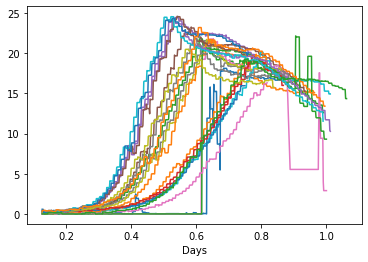

In [2]:
#1 day is 24 hours so remove 1/24*3
hours= 1/24*3
hours
#Remove data before 3 hours -- > 0.125 days
ax=plt.gca()
for i in all_files:
    df_from_each_file =(pd.read_csv(i))
    df= df_from_each_file[df_from_each_file.Days>=hours]
    Days=df[['Days']]
    OUR=df[['OUR']]
    df.plot(x='Days', y='OUR', ax=ax)
    ax.get_legend().remove()
plt.show()

In [5]:
#if the step is higher than a certain range between two consecutive points, we found the experiments suffered from faulty off-gas equipment.
#From both graphs we see that the experiments had same faults, hence an error of about 2 points should already detect the bad experiments
for i in all_files:
    df_from_each_file =(pd.read_csv(i))
    df= df_from_each_file[df_from_each_file.Days>=hours]
    CER=df[['CER']]
    difference=[]
    error=2
    CER= np.array(CER)
    bad_experiment=[]
    for l in range(0,len(CER)-2):
        step = CER[l+1]-CER[l]
        difference.append(step)
        if step > error:
            bad_experiment.append(i)
            print(i,l,step)
    difference=np.array(difference)
    bad_experiment=np.array(bad_experiment)

files\KLG-61.745.csv 364 [8.249843]
files\KLG-61.745.csv 371 [3.91135]
files\KLG-61.745.csv 379 [4.739946]
files\KLG-61.745.csv 394 [8.32005]
files\KLG-61.772.csv 352 [11.89815]
files\KLG-61.772.csv 544 [4.005188]
files\KLG-61.772.csv 545 [3.629941]
files\KLG-62.772.csv 353 [13.62404]


In [ ]:
#UNDERSTAND HOW DELETE

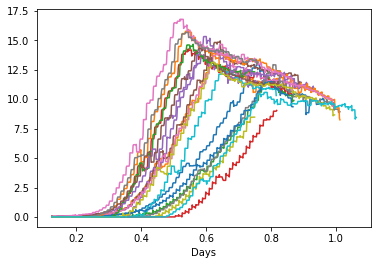

In [11]:
all_files =  glob.glob(os.path.join(path,"*.csv"))
ax=plt.gca()

for i in all_files:
    df_from_each_file =(pd.read_csv(i))
    df= df_from_each_file[df_from_each_file.Days>=hours]
    CER=df[['CER']]
    Days=df[['Days']]
    df.plot(x='Days', y='CER', ax=ax)
    ax.get_legend().remove()
plt.show()

In [10]:
print('Question4:')
print('The measurements are noit continuous. They are punctual measurements taken indivudually at a constant time interval, this justifies the stepped trend')

Question4:
The measurements are noit continuous. They are punctual measurements taken indivudually at a constant time interval, this justifies the stepped trend


In [ ]:
#smooth data with panda rolling mean

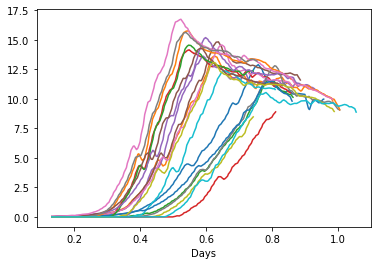

In [12]:
ax=plt.gca()

for i in all_files:
    df_from_each_file =(pd.read_csv(i))
    df= df_from_each_file[df_from_each_file.Days>=hours]
    OUR=df[['OUR']]
    Days=df[['Days']]
    df_mean=df.rolling(10).mean()
    df_mean.plot(x='Days', y='OUR', ax=ax)
    ax.get_legend().remove()
plt.show()

In [13]:
Temperature=[26,26,26,26,24,28,24,26,26,28,28,24,24,26,28,24,28,24,24,26,28,26,28,28,26]
pH=[6.85,6.85,6.85,6.85,6.85,6.85,7.2,6.85,7.2,7.2,6.85,6.85,7.2,7.2,6.85,6.85,7.2,7.2,6.85,7.2,7.2,7.2,6.85,7.2,6.85]

In [14]:
all_files =  glob.glob(os.path.join(path,"*.csv"))
for i in all_files:
    df_from_each_file =(pd.read_csv(i))
    df= df_from_each_file[df_from_each_file.Days>=hours]
    count=0
    df.insert(1,'Temperature',Temperature[count])
    df.insert(1,'pH',pH[count])
    count+1
df.head()

,Days,pH,Temperature,Temp,mVVM,pH,pO2,RPM,Scale1,Scale2,...,Unused .10,Unused .11,Unused .12,Unused .13,Unused .14,Unused .15,Unused .16,Unused .17,Unused .18,run
88,0.125104,6.85,26,24.035,1001.899,7.144,0,851.615,6.177,0,...,0,0,0,0,0,0,0,0,0,KLG-64.771
89,0.126493,6.85,26,23.926,1001.687,7.145,0,863.748,6.179,0,...,0,0,0,0,0,0,0,0,0,KLG-64.771
90,0.127882,6.85,26,24.038,1001.578,7.138,0,856.773,6.230,0,...,0,0,0,0,0,0,0,0,0,KLG-64.771
91,0.129271,6.85,26,23.936,1001.685,7.147,0,851.895,6.164,0,...,0,0,0,0,0,0,0,0,0,KLG-64.771
92,0.130660,6.85,26,24.026,1001.633,7.146,0,862.571,6.157,0,...,0,0,0,0,0,0,0,0,0,KLG-64.771


KeyError: "None of [Index(['Temperature'], dtype='object')] are in the [columns]"

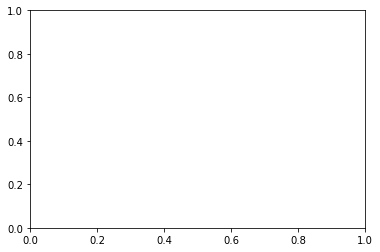

In [15]:
all_files =  glob.glob(os.path.join(path,"*.csv"))
ax=plt.gca()

for i in all_files:
    df_from_each_file =(pd.read_csv(i))
    df= df_from_each_file[df_from_each_file.Days>=hours]
    CER=df[['CER']]
    Days=df[['Days']]
    Temperature=df[['Temperature']]
    df_mean=df.rolling(10).mean()
    #plt.legend(['24','26','28'])
    df_mean.plot(x='Days', y='OUR', style='Temperature' )
    #style from seaborn lybrary plots the different colors according to the values of temperature
plt.show()

In [ ]:
#for 1 dataset

In [20]:
CER=df[['CER']]
OUR=df[['OUR']]
Difference=np.array(OUR)-np.array(CER)
difference=np.array(Difference)
Days=df[['Days']]
Days=np.array(Days)
Days
DT=[]
Difference_point=[]
Integral=[]

604


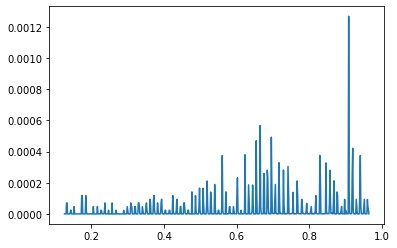

In [21]:
print(len(Difference))

for i in range(0,len(Days)-1):
    dt=Days[i+1]-Days[i]
    DT.append(dt)
    diff=abs((difference[i+1]-difference[i])/2)
    Difference_point.append(diff)
    Integral.append(dt*diff)
DT=np.array(DT)
Difference_point=np.array(Difference_point)
Integral=np.array(Integral)
ax=plt.subplots(nrows=1,ncols=1)
plt.plot( np.ravel(Days[1:]),np.ravel(Integral))

In [ ]:
#for all datsets

<ipython-input-26-0eba73d3813c>:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  ax=plt.subplots(nrows=1,ncols=1)


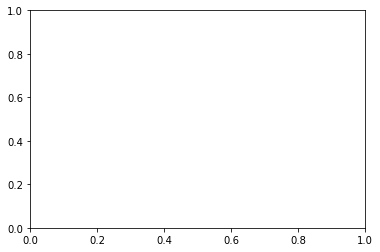

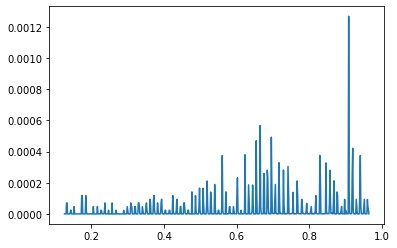

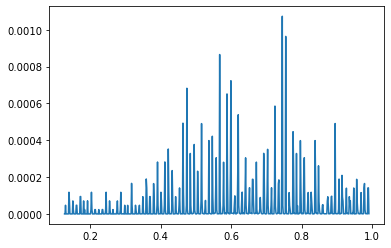

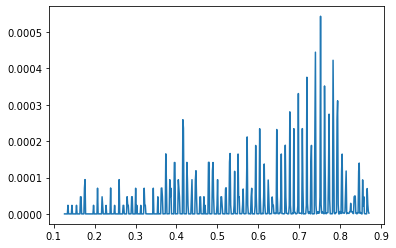

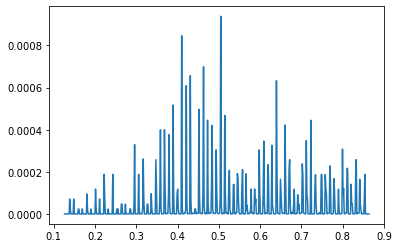

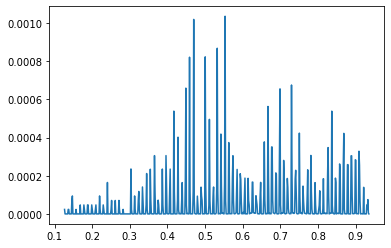

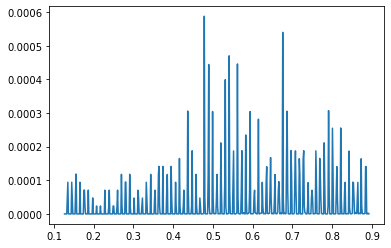

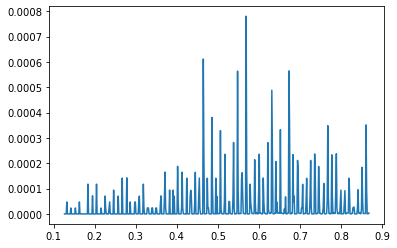

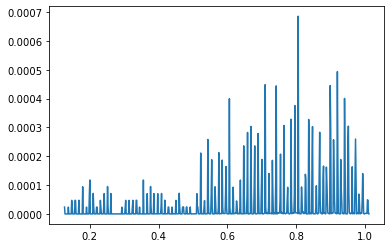

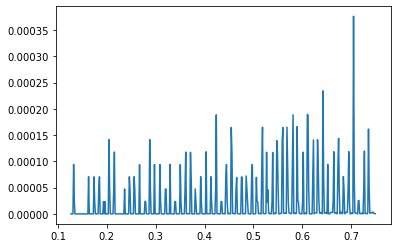

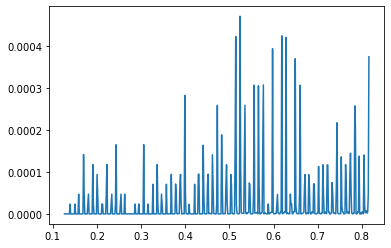

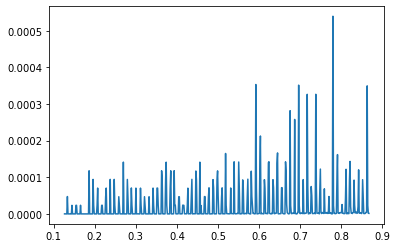

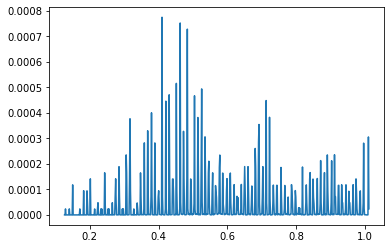

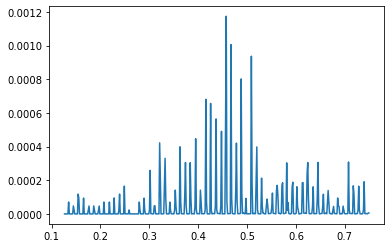

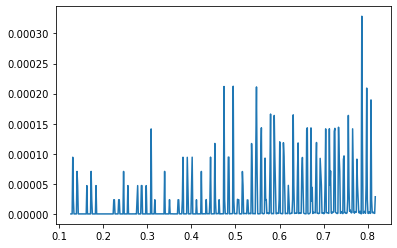

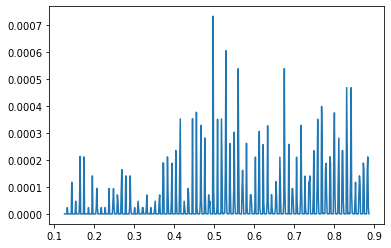

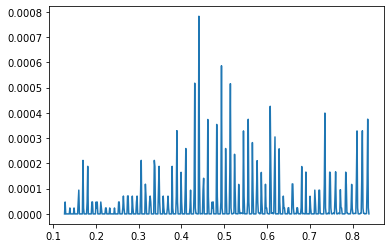

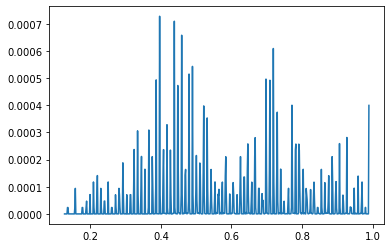

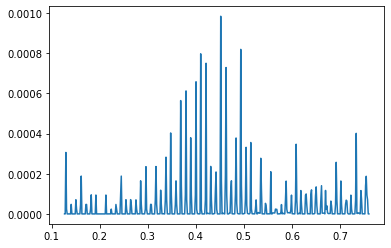

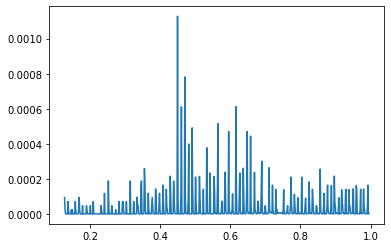

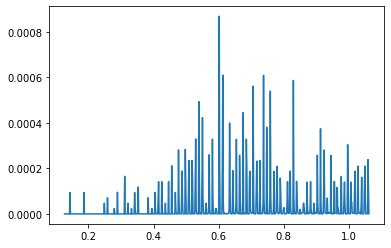

In [26]:
ax=plt.gca()
all_files =  glob.glob(os.path.join(path,"*.csv"))
for i in all_files:
    df_from_each_file =(pd.read_csv(i))
    df= df_from_each_file[df_from_each_file.Days>=hours]
    CER=df[['CER']]
    OUR=df[['OUR']]
    Difference=np.array(OUR)-np.array(CER)
    difference=np.array(Difference)
    Days=df[['Days']]
    Days=np.array(Days)
    Days
    DT=[]
    Difference_point=[]
    Integral=[]
    for i in range(0,len(Days)-1):
        dt=Days[i+1]-Days[i]
        DT.append(dt)
        diff=abs((difference[i+1]-difference[i])/2)
        Difference_point.append(diff)
        Integral.append(dt*diff)
    DT=np.array(DT)
    Difference_point=np.array(Difference_point)
    Integral=np.array(Integral)
    ax=plt.subplots(nrows=1,ncols=1)
    plt.plot( np.ravel(Days[1:]),np.ravel(Integral))

In [18]:
import scipy.stats

[ 7.6231937  10.71470341]
[ 8.34950688 12.77572486]
[6.54109433 8.87291268]
[ 9.65002333 15.25156364]
[ 9.02797044 13.65546038]
[ 9.74724151 14.59759956]
[ 9.38216357 13.99086606]
[7.20381724 9.66380467]
[3.92095395 5.42815745]
[ 8.45116179 12.03679345]
[6.65834512 9.2406403 ]
[ 8.48317606 14.48430148]
[10.8134691  16.66702925]
[3.84636932 5.10847026]
[ 9.71814863 15.07166687]
[ 9.54152195 14.97960858]
[ 8.44666888 15.20608315]
[11.72337058 18.51888754]
[ 8.07466646 12.12488849]
[6.69859214 8.81362207]


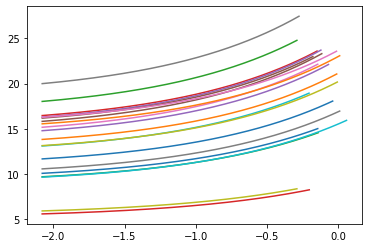

In [29]:
ax=plt.gca()
all_files =  glob.glob(os.path.join(path,"*.csv"))
for i in all_files:
    df_from_each_file =(pd.read_csv(i))
    df= df_from_each_file[df_from_each_file.Days>=hours]
    CER=df[['CER']]
    Days=df[['Days']]
    x=np.ravel(Days)
    y=np.ravel(CER)
    coeff= np.polyfit(np.log(x), y, 1)
    print(coeff)
    new_y=np.exp(coeff[1])*np.exp(coeff[0]*x)
    plt.plot( np.log(x),np.log(new_y))

In [32]:
print('Question 9:')
print('''the exponential trend is not enough to capture the descential trend post peak. I'd rather use a polinomial fitting (with numpy.polyfit) to detect the entire trend of the data trend''')

Question 9:
the exponential trend is not enough to capture the descential trend post peak. I'd rather use a polinomial fitting (with numpy.polyfit) to detect the entire trend of the data trend


In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#we haev a two factors analysis 
for i in all_files:
    df_from_each_file =(pd.read_csv(i))
    df= df_from_each_file[df_from_each_file.Days>=hours]
    df=df.dropna()
    count=0
    df.insert(1,'Temperature',Temperature[count])
    df.insert(1,'pH',pH[count])
    count+1
    manova= MANOVA.from_formula('CER+OUR''Temperature+pH', data=df)
    print(manova.mv_test())
    #Check the Wilks' lambda to detect which influence the most if PH or Temperature
    reg=ols('CER''Temperature+pH',data=df).fit()
    aov=sm.stats.anova_lm(reg,type=2)
    #posthoc analysis
    mc=parwise_tukeyhsd(df['CER'],df['Temperature'])
    print(mc)
    #repèete for the other factors

PatsyError: Error evaluating factor: NameError: name 'OURTemperature' is not defined
    CER+OURTemperature+pH
        ^^^^^^^^^^^^^^